# Routhov kriterij stabilnosti

Python funkcije koje se koriste za ove operacije dio su ```Sympy``` knjiznice.
```python
* symbols
* Poly
* Matrix
* solve
* plot_implicit
* sympy.matrices.zeros
```

In [1]:
import os
clear = lambda: os.system('cls')
clear()

0

In [2]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)

from sympy import symbols, Poly, Matrix, solve, plot_implicit
from sympy.matrices import zeros
s = symbols('s')

## Funkcija za racunanje Routhovog kriterija stabilnosti
Iz razloga sto ```Control Systems Library``` nema definiranu funkciju za racunanje Routhovog kriterija stabilnosti potrebno ju je definirati.

In [3]:
def routhHurwitz(Ts,*args):
    den = Poly(Ts.as_numer_denom()[1],s).all_coeffs()
    n = len(den)-1
    if n < 2:
        return None
    m = zeros(n+1)
    # Insert the first two rows
    c = [den[i] for i in range(0,n+1,2)]
    for i in range(0,len(c)):
        m[0,i] = c[i]
    c = [den[i] for i in range(1,n+1,2)]
    for i in range(0,len(c)):
        m[1,i] = c[i]

    for i in range(2,n+1):
        for j in range(1,n):
            if m[i-1,j] == 0:
                m[i,j-1] = m[i-2,j]
            elif m[i-1,0] !=0:
                m[i,j-1] = ((m[i-1,0]*m[i-2,j]-m[i-2,0]*m[i-1,j])/m[i-1,0]).together().simplify()
          
      
    m = m.col_insert(0, Matrix(([s**(n-i) for i in range(0,n+1)])))
    return m

In [4]:
tf = (s / (s**3+2*s**2+4*s+12))
display(tf)

In [5]:
routhHurwitz(tf)

⎡ 3              ⎤
⎢s   1   4   0  0⎥
⎢                ⎥
⎢ 2              ⎥
⎢s   2   12  0  0⎥
⎢                ⎥
⎢s   -2  0   0  0⎥
⎢                ⎥
⎣1   12  0   0  0⎦

## Primjer 2: Osnove Regulacijske Tehnike - Stabilnost sustava - Primjer 8

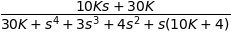

In [6]:
K = symbols('K')
tf = ((10*K*s+30*K) / (s**4+3*s**3+4*s**2+(10*K+4)*s+30*K))
display(tf)

In [7]:
matrica = routhHurwitz(tf)
display(matrica)

⎡ 4                                          ⎤
⎢s           1              4      30⋅K  0  0⎥
⎢                                            ⎥
⎢ 3                                          ⎥
⎢s           3           10⋅K + 4   0    0  0⎥
⎢                                            ⎥
⎢ 2        10⋅K   8                          ⎥
⎢s       - ──── + ─        30⋅K     0    0  0⎥
⎢           3     3                          ⎥
⎢                                            ⎥
⎢        2                                   ⎥
⎢    50⋅K  + 115⋅K - 16                      ⎥
⎢s   ──────────────────     0       0    0  0⎥
⎢         5⋅K - 4                            ⎥
⎢                                            ⎥
⎣1          30⋅K            0       0    0  0⎦

In [8]:
from sympy.solvers.inequalities import solve_rational_inequalities

In [9]:
uvjet1 = matrica[0, 3]
display(uvjet1)
plot_implicit(uvjet1>0)
solve(uvjet1>0)

<Figure size 640x480 with 1 Axes>

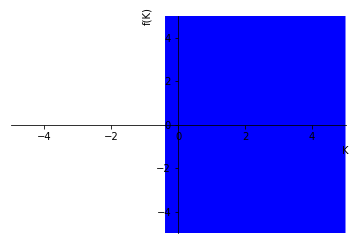

In [10]:
uvjet2 = matrica[1,2]
display(uvjet2)
plot_implicit(uvjet2>0)
solve(uvjet2>0)

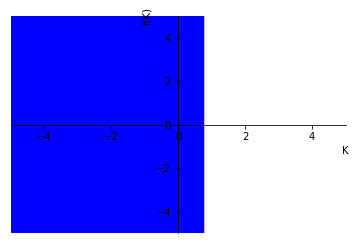

In [11]:
uvjet3 = matrica[2, 1]
display(uvjet3)
plot_implicit(uvjet3>0)
solve(uvjet3>0)

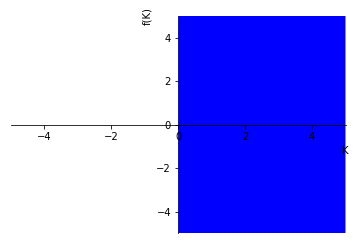

In [12]:
uvjet4 = matrica[2, 2]
display(uvjet4)
plot_implicit(uvjet4>0)
solve(uvjet4>0)

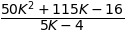

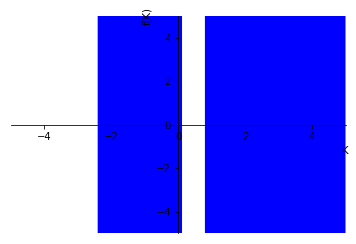

In [13]:
uvjet5 = matrica[3, 1]
display(uvjet5)
uvjet5 = uvjet5>0
plot_implicit(uvjet5)
solve(uvjet5)

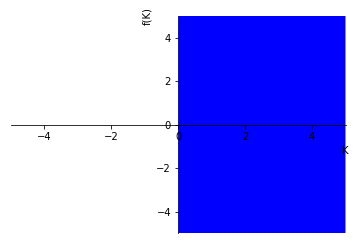

In [14]:
uvjet6 = matrica[4, 1]
display(uvjet6)
uvjet6 = uvjet6>0
plot_implicit(uvjet6)
solve(uvjet6)

## Primjer 3: Osnove Regulacijske Tehnike - Stabilnost sustava - Primjer 7

```Sympy``` ne moze rjesavati nejednadzbe s vise varijabli, no i dalje smo u mogucnosti dobiti Routhov kriterij stabilnosti te graficki prikazati stabilno podrucje ```plot_implicit(NEJEDNAKOST)``` funkcijom.  
  
Potrebno je obratiti paznju na sto je u prikazu, u slucajevima s dvije varijable prikaz ne mora znaciti podrucje stabilnosti.

In [15]:
K1, K2 = symbols('K1 K2', real=True, rational=True)
T1, T2 = symbols('T1 T2')
t1 = 0.05
t2 = 0.1

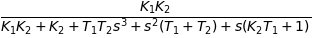

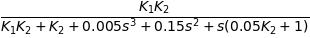

In [16]:
tf = (K1*K2) / ((T1*T2*s**3) + (T1+T2)*s**2 + (1+T1*K2)*s + K2 + (K1*K2))
display(tf)
tf = tf.subs(T1, t1)
tf = tf.subs(T2, t2)
display(tf)

In [17]:
matrica = routhHurwitz(tf)
display(matrica)

⎡ 3                                                                           
⎢s                            0.005                             0.05⋅K₂ + 1.0 
⎢                                                                             
⎢ 2                                                                           
⎢s                            0.15                            1.0⋅K₁⋅K₂ + 1.0⋅
⎢                                                                             
⎢s   -0.0333333333333333⋅K₁⋅K₂ + 0.0166666666666667⋅K₂ + 1.0          0       
⎢                                                                             
⎣1                     1.0⋅K₁⋅K₂ + 1.0⋅K₂                             0       

        ⎤
    0  0⎥
        ⎥
        ⎥
K₂  0  0⎥
        ⎥
    0  0⎥
        ⎥
    0  0⎦

U slucajevima gdje prikazujemo graf u zavisnosti dvije varijable, recimo ovdje ```K1``` i ```K2``` mozemo definirati koja os u grafu se odnosi na koju varijablu putem argumenta ```... , y_var=K1, x_var=K2)``` u funkciji ```plot_implicit(NEJEDNAKOST, ARGUMENT)```

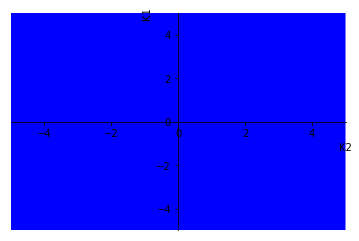

In [18]:
uvjet1 = matrica[0,2]
display(uvjet1)
plot_implicit(uvjet1>0, y_var=K1, x_var=K2)
solve(uvjet1>0)

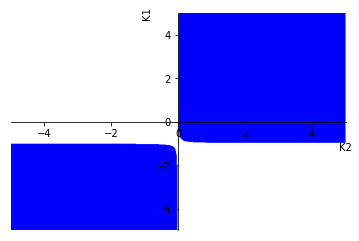

In [19]:
uvjet2 = matrica[1, 2]
display(uvjet2)
plot_implicit(uvjet2>0, y_var=K1, x_var=K2)

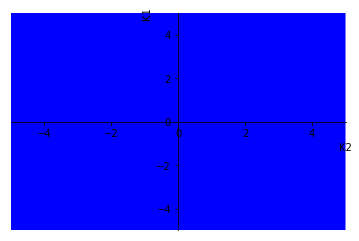

In [20]:
uvjet3 = matrica[2, 1]
display(uvjet3)
plot_implicit(uvjet3>0, y_var=K1, x_var=K2)

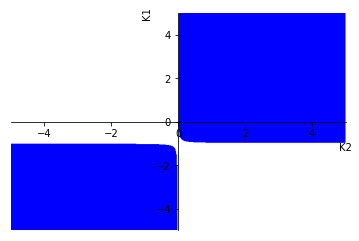

In [21]:
uvjet4 = matrica[3, 1]
display(uvjet4)
plot_implicit(uvjet4>0, y_var=K1, x_var=K2)